In [1]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

In [2]:
import numpy as np
np.random.randint(100, 10_000)

8165

In [3]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/mwchelle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [18]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [19]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [20]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

In [21]:
sorted_recipe = sorted(recipes_df['name'], key=len)
shortest_recipe = sorted_recipe[0]
longest_recipe = sorted_recipe[-1]

print(shortest_recipe)
print(longest_recipe)

bread
warm spinach  fig  and prosciutto salad with honey balsamic vina


In [22]:
from wordcloud import WordCloud

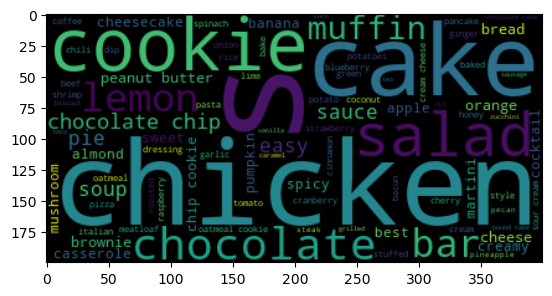

In [23]:
all_names = ' '.join(recipes_df['name'])
wordcloud = WordCloud().generate(all_names)

plt.imshow(wordcloud, interpolation='bilinear')

In [24]:
recipe_names = embedder.encode(recipes_df["name"].to_numpy())
names_df = pd.DataFrame(recipe_names, index=recipes_df.index)
names_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
42,-0.333475,0.227865,-0.307339,0.410549,0.917104,-0.345506,0.305810,0.256676,-0.147711,0.040728,...,-0.053025,-0.209463,0.362418,-0.246086,0.208379,-0.024874,0.506561,0.197738,-0.386421,-0.002183
101,-0.024523,0.246223,-0.055709,0.358273,0.454786,-0.088055,0.260368,0.231947,0.093013,-0.007835,...,0.144861,-0.435459,0.208344,-0.002655,-0.081199,-0.130489,0.452379,0.186310,-0.278500,0.028580
129,-0.026562,0.194671,0.038101,-0.099181,0.653784,-0.230869,0.064516,0.001376,-0.061280,0.232095,...,0.169605,0.239354,0.392649,0.271398,-0.093971,0.060101,-0.281417,0.133210,-0.122344,-0.109863
138,-0.168002,-0.219219,0.330761,0.302196,-0.173169,0.204557,0.192390,0.140975,0.303174,0.038062,...,0.019094,-0.002448,0.437833,0.563785,0.033442,0.187658,0.529252,-0.233786,0.509932,0.410715
163,0.061076,-0.333799,0.242906,0.395977,-0.466468,0.496505,-0.136754,0.122097,0.114249,0.065317,...,0.044438,-0.213658,0.410352,-0.233599,-0.224422,0.094331,0.173351,0.105782,-0.114749,-0.150677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231430,-0.009714,0.200162,0.018329,0.237817,0.748988,0.121919,0.087918,0.216755,-0.291040,0.074165,...,-0.120458,0.162878,0.480063,0.235902,0.146278,0.252979,-0.063640,-0.066044,-0.133067,-0.034040
231514,-0.106531,-0.034574,0.160070,0.258504,0.882481,0.091899,0.008815,0.372013,-0.266542,0.085017,...,0.063241,-0.099132,0.332694,0.031868,0.582796,0.216874,0.241107,0.091759,-0.261551,-0.082310
231547,0.016149,-0.053035,-0.035098,-0.021835,0.735161,0.245519,-0.151837,0.003954,0.102567,0.001363,...,0.102296,0.023822,0.602685,-0.067071,0.177534,0.253982,0.242440,-0.436001,-0.053910,0.012423
231596,0.026659,0.202482,0.344634,-0.138708,0.514424,0.630947,-0.003164,-0.102897,-0.434900,-0.192056,...,-0.162457,0.130695,0.113645,0.186650,-0.155393,0.130507,1.146239,-0.240861,0.236830,0.177123


/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1

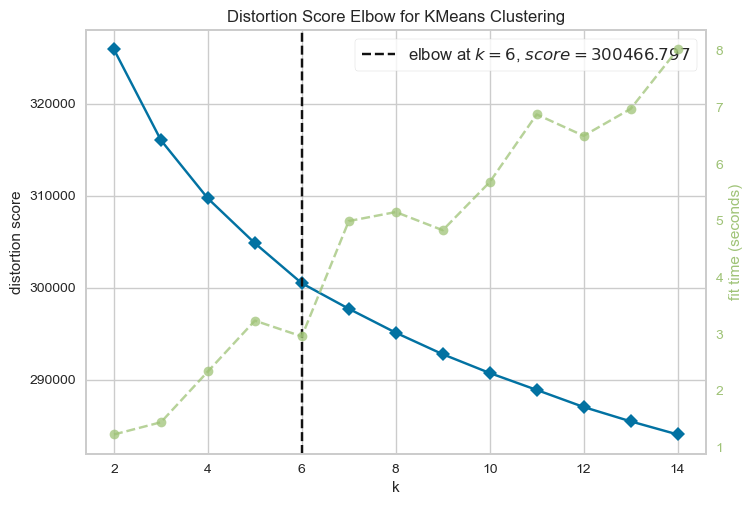

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer

k_values = range(2, 15)

kmeans = KMeans(random_state = 42)

elbow = KElbowVisualizer(kmeans, k=k_values, metric="distortion")
elbow.fit(names_df)
elbow.show()

/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


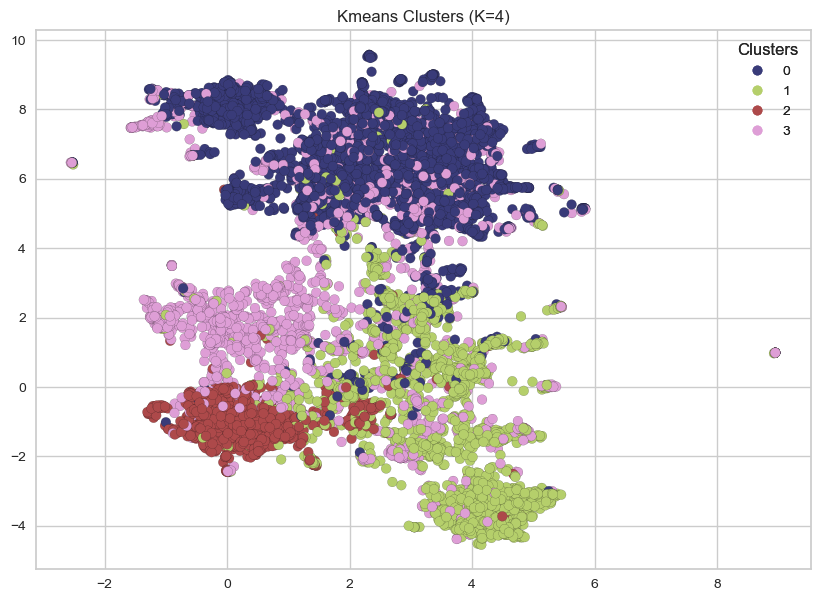

/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


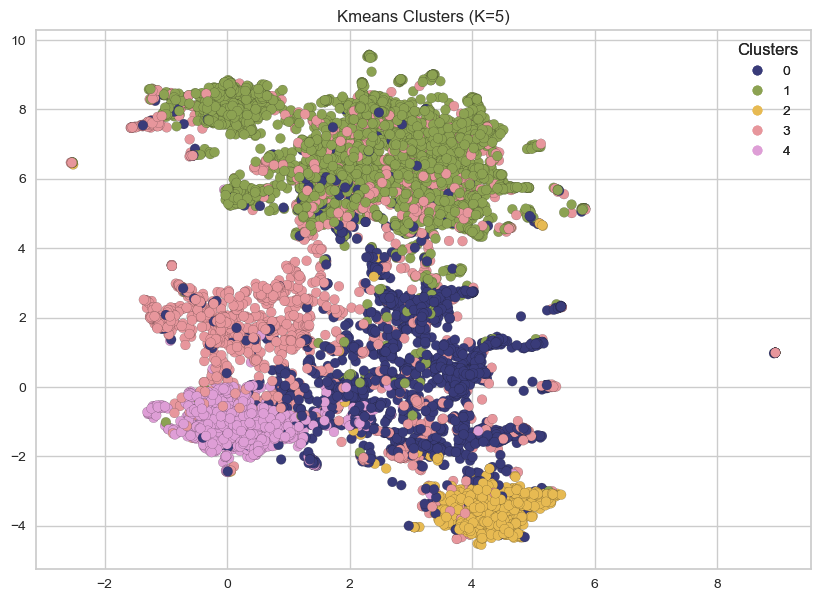

/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


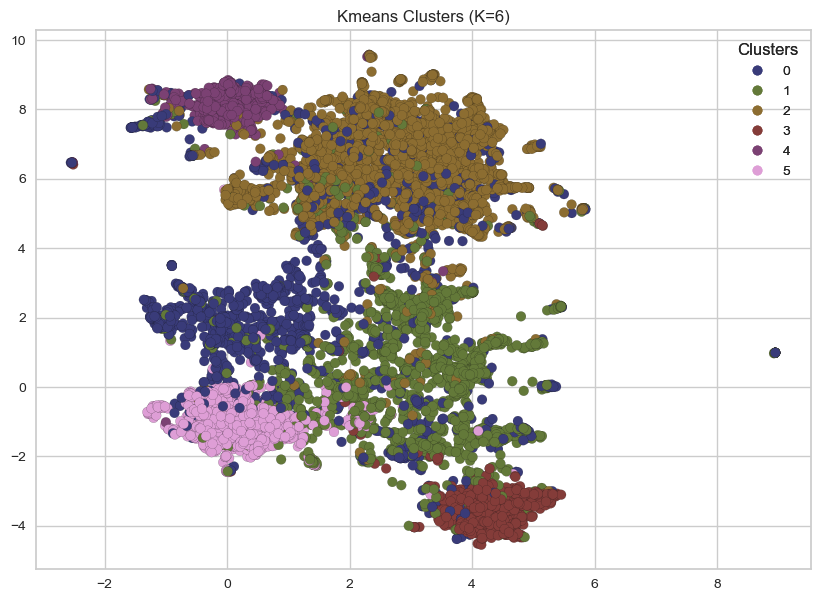

/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


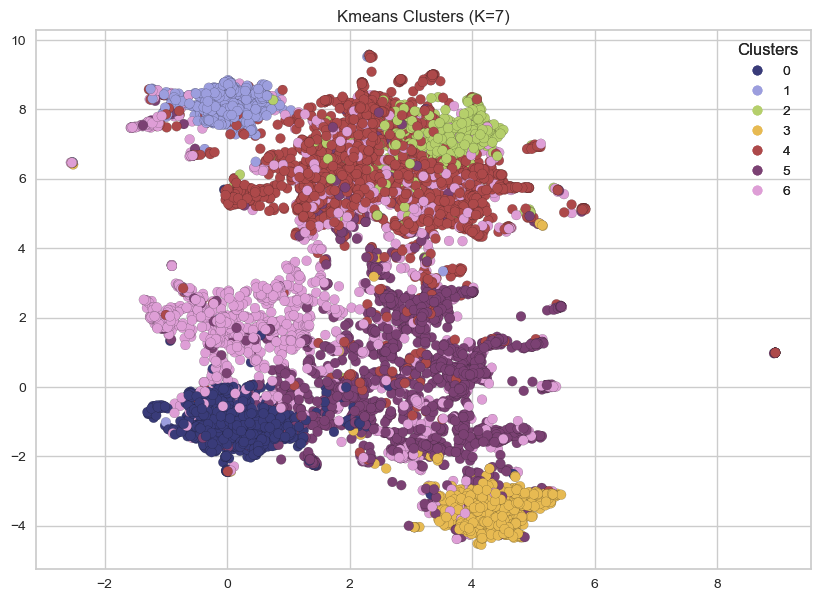

In [26]:
k_values_range = range(4, 8)

for k in k_values_range:
    kmeans_umap = KMeans(n_clusters = k, random_state = 42)
    cluster_labels = kmeans_umap.fit_predict(names_df)

    plot_umap_clusters(names_df, cluster_labels, title=f"Kmeans Clusters (K={k})", n_neighbors = 10)

<!-- END QUESTION -->

<br><br>

From the above visualizations, we can observe both clustering patterns and the Elbow plot. With the elbow plot we can identify the point where the point of inflection occurs and the inertia begins to plateau. This identified elbow plot can help us narrow down the range of values based on where the inertia decrease starts to slow down, in this case, narrowing down the test range to 4-8 (around the "elbow" point). The cluster pattern visualization can help us view how the datapoints are grouped together. We can visually identify overfitting and underfitting by observation where the clusters are too high and fragmented and when the clusters are large and not meaningful, respectively. As such, the optimal value of n_clusters typically occurs where the clusters are well-seperated. With both of those visualizations in mind, the value that seems the most reasonable is K=6, where although there is some overlapping colours, each component is generally seperated and distinctive.

<!-- END QUESTION -->

<br><br>

In [27]:
n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(names_df)

print(f"Sampled Recipes for KMeans Clustering (n_clusters={n_clusters}):")
for cluster_label in range(n_clusters):
    cluster_indices = np.where(cluster_labels == cluster_label)[0]
    if len(cluster_indices) == 0:
        continue
    sampled_indices = np.random.choice(cluster_indices, min(15, len(cluster_indices)), replace=False)
    sampled_recipes = recipes_df.iloc[sampled_indices]["name"]
    
    print(f"Cluster {cluster_label}:")
    for recipe_name in sampled_recipes:
        print(f"- {recipe_name}")
    print()

/Users/mwchelle/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sampled Recipes for KMeans Clustering (n_clusters=6):
Cluster 0:
- tropical white chocolate pound cake
- coconut sour cream cake
- carrot cake mix muffins
- sopaipilla cheese cake
- raspberry chocolate chip bundt cake
- anne s liniment cake   anne of green gables
- cornstarch cake
- chocolate black tea cake
- chocolate banana cake
- lazy daisy cake
- perfect red velvet bundt cake
- buckeye cake
- golden chocolate cake
- upside down pumpkin cake
- golden grand marnier cake

Cluster 1:
- low fat southwestern layered salad
- italian ranch salad dressing
- creamy balsamic salad dressing
- shrimp salad with zucchini and basil
- moroccan orange blossom scented carrot salad
- cold tomato   cheese salad
- curried corn salad with tomato
- avocado strawberry salad
- chopped veggie salad
- marra s light citrus buttermilk salad dressing
- confetti bean and rice salad
- jen s taco salad
- connie griffin s  signature salad
- spiral macaroni salad
- crunchy mexicorn salad

Cluster 2:
- junebug
- sgro

There is a fairly clear distinction between the clusters, seemingly based on the types of dishes grouped within the category. Though, there is still obvious overlap/lack of clarity within the grouping for certain clustering results. For example, Cluster 0 seems to be a mix of beverages like cocktails alongside some desserts like the souffle and creme brulee. Cluster 1 tends to cover breads and baked goods, fairly distinctively. Cluster 2 seems to only include mains, though they cross categories, ingredients, and cultures. The remaining 3 clusters are extremely distinct, with Cluster 3 being for cookies, Cluster 4 being for salads, and Cluster 5 being for cake recipes. So although it seems there are clear themes in each cluster, not every one is as clear/distinctive as the others.

<!-- END QUESTION -->

<br><br>

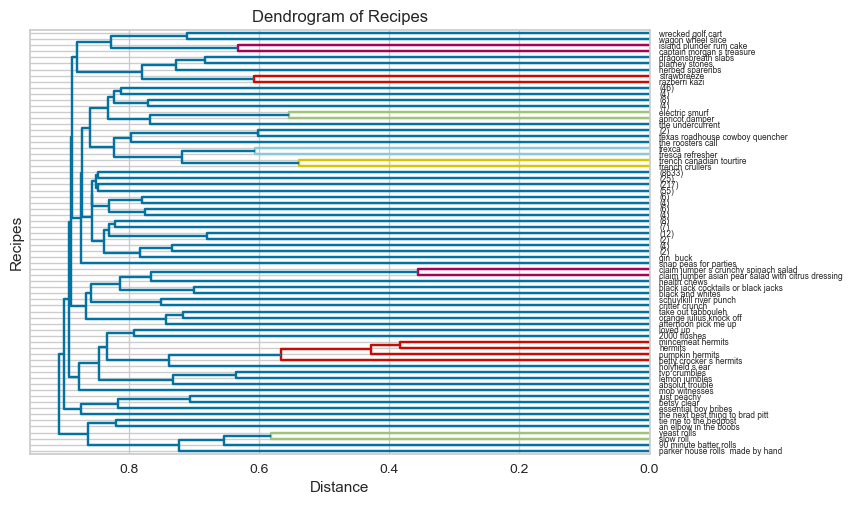

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

clustering = linkage(names_df, method='average', metric = 'cosine')
plt.figure()
dendrogram(clustering, p=10, truncate_mode = 'level', orientation='left', labels=recipes_df['name'].values)
plt.title("Dendrogram of Recipes")
plt.xlabel("Distance")
plt.ylabel("Recipes")
plt.show()